# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [225]:
import pandas as pd

In [226]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [72]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [73]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [74]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [76]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu



# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

In [53]:
# CODE HERE
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

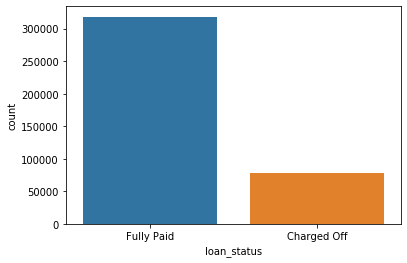

In [65]:
sns.countplot(x='loan_status',data=df)

In [38]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


**TASK: Create a histogram of the loan_amnt column.**

Text(0.5, 1.0, 'Loan amount distribution')

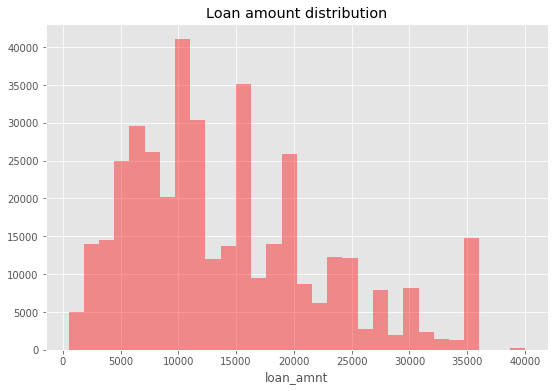

In [107]:
sns.distplot(df["loan_amnt"], bins= 30, color="red", kde=False)
plt.title("Loan amount distribution")

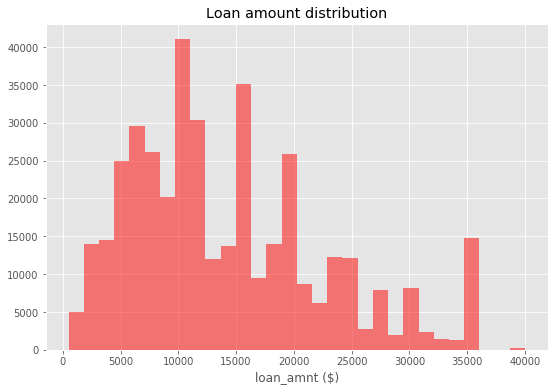

In [99]:
df["loan_amnt"].hist(bins = 30, color="red", alpha=0.5)
plt.xlabel("loan_amnt ($)")
plt.title("Loan amount distribution")
plt.rcParams['figure.figsize'] = 9, 6
plt.show()

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [125]:
pd.DataFrame.corr?

In [115]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

In [227]:
# CODE HERE
sns.heatmap?

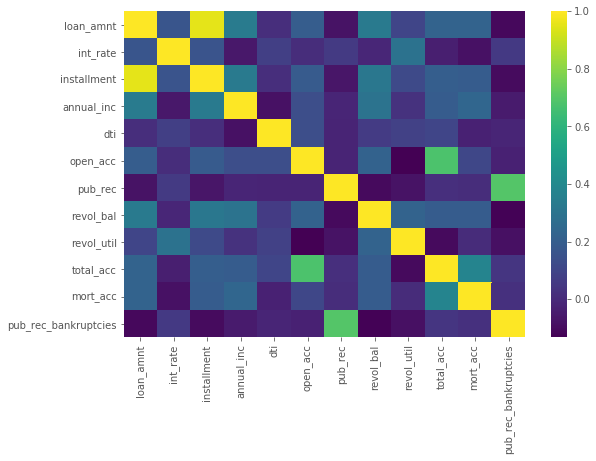

In [132]:
sns.heatmap(df.corr(), cmap="viridis")

The monthly payment owed by the borrower if the loan originates.


(array([318357.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  77673.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

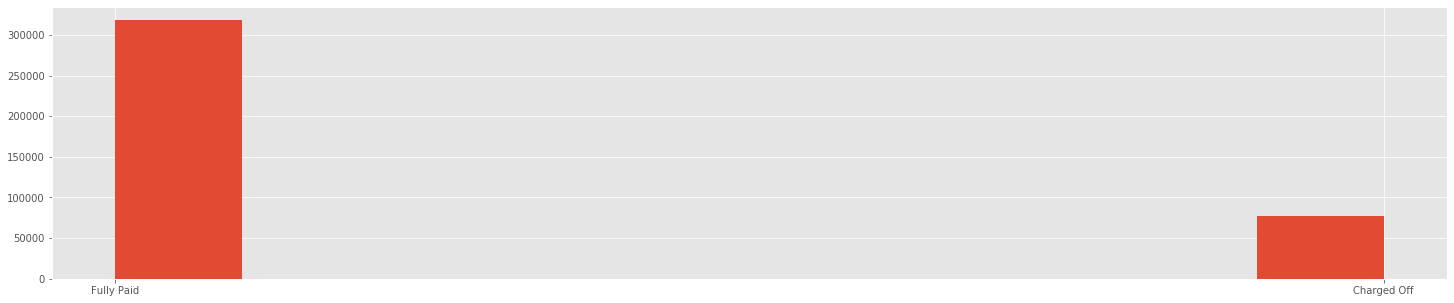

In [228]:
feat_info("installment")

np.unique(df["loan_status"].values)
plt.hist(df["loan_status"].values)

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

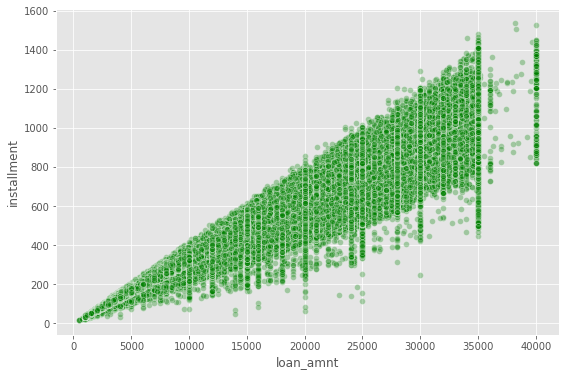

In [151]:
# CODE HERE
sns.scatterplot(x=df["loan_amnt"],y=df["installment"], alpha=0.3, color="green")

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

In [152]:
# CODE HERE
sns.boxplot?

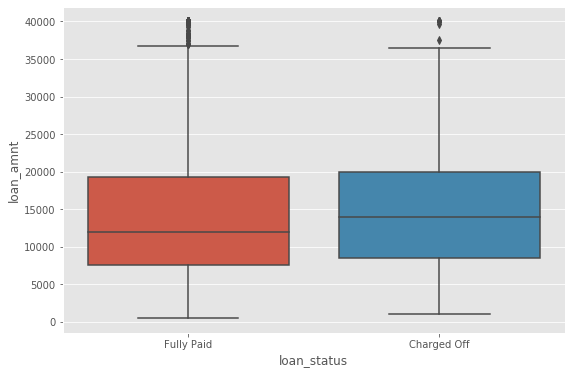

In [154]:
sns.boxplot(
    x = "loan_status",
    y = "loan_amnt",
    data = df
)

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [162]:
# CODE HERE
df[["loan_amnt", "loan_status"]].groupby("loan_status").describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               
                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19225.0  40000.0

**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [168]:
# CODE HERE
feat_info("grade")
feat_info("sub_grade")

LC assigned loan grade
LC assigned loan subgrade


In [170]:
np.unique(df["grade"].values)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [171]:
np.unique(df["sub_grade"].values)

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

In [172]:
# CODE HERE
sns.countplot?

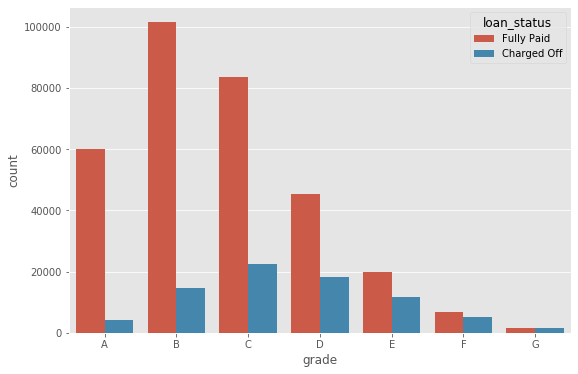

In [177]:
sns.countplot(
    x = "grade",
    hue = "loan_status",
    order = np.unique(df["grade"].values),
    data = df
)

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

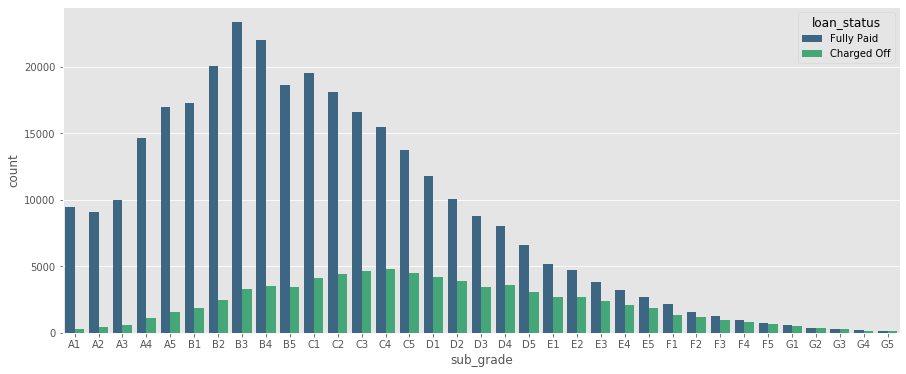

In [185]:
#CODE HERE
sns.countplot?
sns.countplot(
    x = "sub_grade",
    data = df,
    order = np.unique(df["sub_grade"].values),
    hue = "loan_status",
    palette = "viridis"
)
plt.rcParams['figure.figsize'] = 15, 6
plt.show()

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

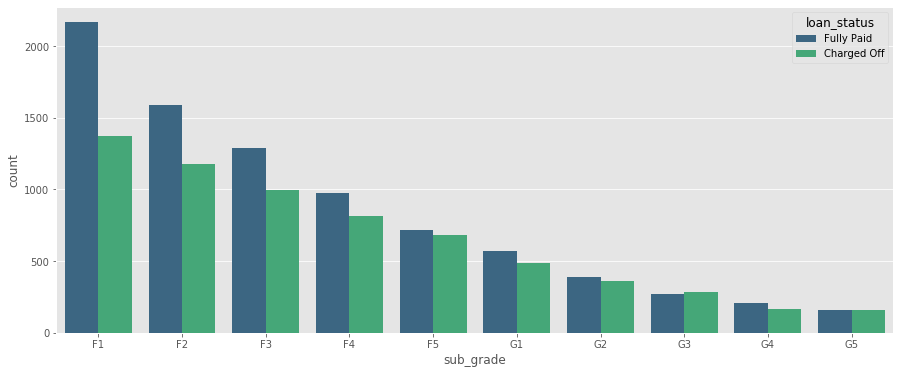

In [193]:
# CODE HERE
df_subset = df[(df["grade"] == "F") | (df["grade"] == "G")]
sns.countplot(
    x = "sub_grade",
    data = df_subset,
    order = np.unique(df_subset["sub_grade"].values),
    hue = "loan_status",
    palette = "viridis"
)
plt.rcParams['figure.figsize'] = 15, 6
plt.show()

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [199]:
# CODE HERE
df["loan_repaid"] = df['loan_status'].apply(lambda x: 1 if x == "Fully Paid" else 0)

**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

In [221]:
#CODE HERE
df_corr = df.corr()[["loan_repaid"]]
df_corr['variable'] = df_corr.index
df_corr = df_corr.drop("loan_repaid")

In [ ]:
sns.barplot(
    x = "variable",
    y = "loan_repaid",
    data = df_corr,
    color="blue"
)
plt.rcParams['figure.figsize'] = 25,5

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [233]:
# CODE HERE
len(df)

396030

In [236]:
df.count().apply(lambda x: len(df) - x)

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
variable                    0
dtype: int64

In [237]:
df[["emp_title","emp_length","title","revol_util","mort_acc","pub_rec_bankruptcies"]]

,emp_title,emp_length,title,revol_util,mort_acc,pub_rec_bankruptcies
0,Marketing,10+ years,Vacation,41.8,0.0,0.0
1,Credit analyst,4 years,Debt consolidation,53.3,3.0,0.0
2,Statistician,< 1 year,Credit card refinancing,92.2,0.0,0.0
3,Client Advocate,6 years,Credit card refinancing,21.5,0.0,0.0
4,Destiny Management Inc.,9 years,Credit Card Refinance,69.8,1.0,0.0
...,...,...,...,...,...,...
396025,licensed bankere,2 years,Debt consolidation,34.3,0.0,0.0
396026,Agent,5 years,Debt consolidation,95.7,1.0,0.0
396027,City Carrier,10+ years,pay off credit cards,66.9,0.0,0.0
396028,"Gracon Services, Inc",10+ years,Loanforpayoff,53.8,5.0,0.0


**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [376]:
# CODE HERE
def missing_data(df: pd.DataFrame):
    return df.count().apply(lambda x: 100*(len(df) - x)/len(df))

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [240]:
# CODE HERE
feat_info("emp_title")
print('\n')
feat_info("emp_length")
print('\n')
feat_info("title")
print('\n')
feat_info("revol_util")
print('\n')
feat_info("mort_acc")
print('\n')
feat_info("pub_rec_bankruptcies")

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


The loan title provided by the borrower


Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


Number of mortgage accounts.


Number of public record bankruptcies


**TASK: How many unique employment job titles are there?**

In [253]:
# CODE HERE
# df["title"].unique()
len(df["emp_title"].unique())

173106

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [257]:
# CODE HERE
df = df.drop(["emp_title"], axis=1)

In [261]:
df["emp_length"].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [ ]:
sns.countplot?

In [294]:
emp_length_order = df["emp_length"].unique()
emp_length_order

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

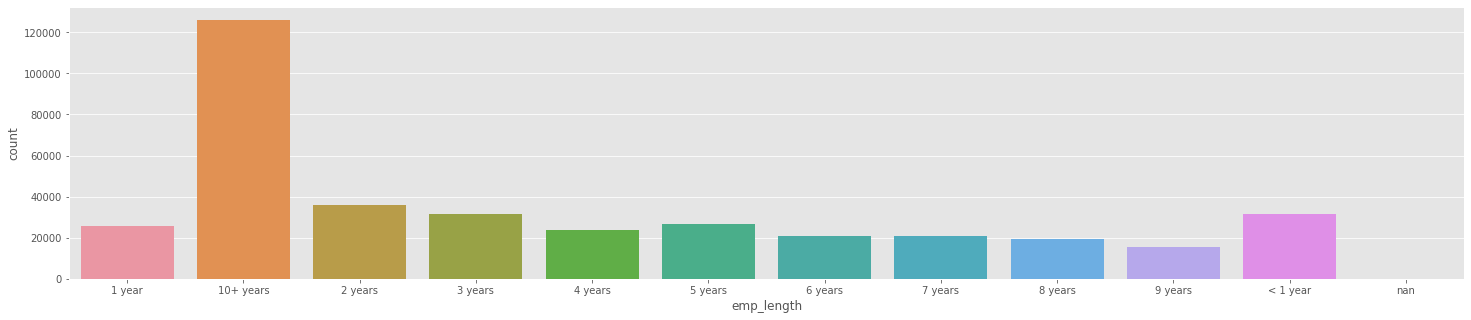

In [288]:
# CODE HERE
sns.countplot(
    x="emp_length",
    data=df,
    order = emp_length_order
)

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

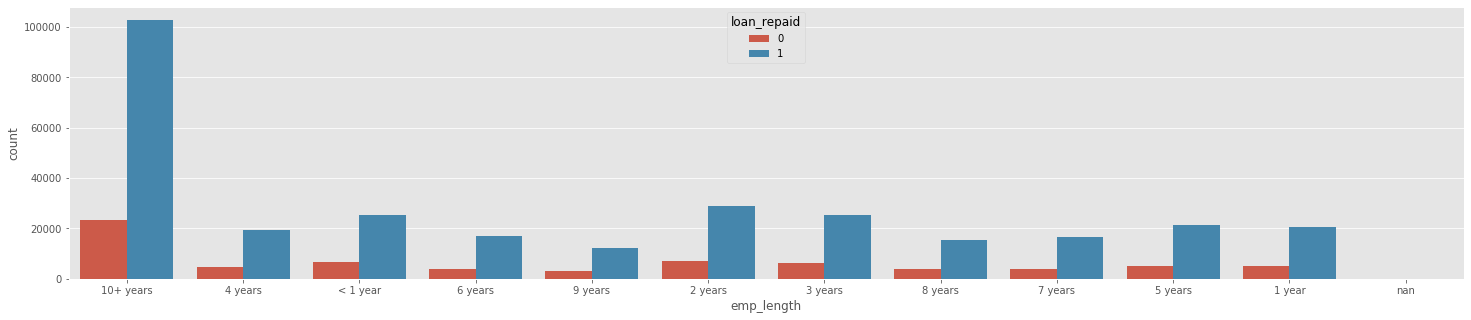

In [298]:
# CODE HERE
sns.countplot(
    x="emp_length",
    hue = "loan_repaid",
    data=df,
    order = emp_length_order
)

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [306]:
# CODE HERE
df[["emp_length", "loan_repaid"]]

,emp_length,loan_repaid
0,10+ years,1
1,4 years,1
2,< 1 year,1
3,6 years,1
4,9 years,0
...,...,...
396025,2 years,1
396026,5 years,1
396027,10+ years,1
396028,10+ years,1


In [332]:
df_length = df[["emp_length", "loan_repaid"]].groupby("emp_length").count()
df_length.columns = ['total_count']

In [352]:
df_emp = df[["emp_length", "loan_repaid"]].groupby("emp_length").sum()\
.join(df_length, on="emp_length")

df_emp["pct_paid (%)"] = df_emp.apply(lambda x: (100*x["loan_repaid"])/x["total_count"], axis=1)
# df_emp["emp_length"] = df.index
df_emp

,loan_repaid,total_count,pct_paid (%)
emp_length,,,
1 year,20728,25882,80.086547
10+ years,102826,126041,81.581390
2 years,28903,35827,80.673794
3 years,25483,31665,80.476867
4 years,19344,23952,80.761523
5 years,21403,26495,80.781279
6 years,16898,20841,81.080562
7 years,16764,20819,80.522600
8 years,15339,19168,80.023998


In [351]:
# sns.barplot(
#     x = "emp_length",
#     y = "pct_paid (%)",
#     data=df_emp
# )
df_emp.index

Index(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year'],
      dtype='object', name='emp_length')

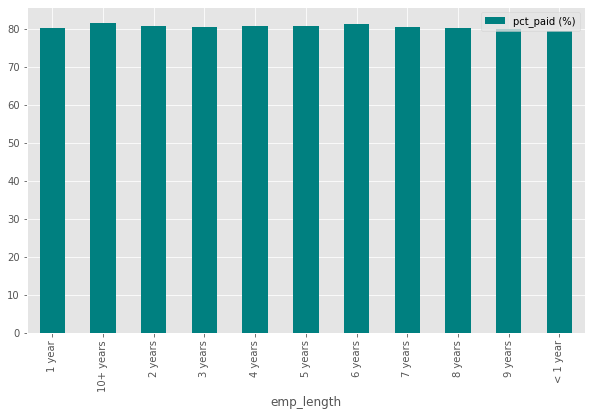

In [367]:
df_emp[["pct_paid (%)"]].plot(kind="bar", color="teal")
plt.rcParams['figure.figsize'] =(5,6)

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [373]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'variable'],
      dtype='object')

In [372]:
# CODE HERE
df = df.drop("emp_length", axis = 1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'variable'],
      dtype='object')

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [377]:
missing_data(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
variable                0.000000
dtype: float64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [378]:
# CODE HERE
df[["title", "purpose"]]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


In [72]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [380]:
# CODE HERE
df = df.drop("title", axis = 1)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [383]:
# CODE HERE
df[["mort_acc"]]

,mort_acc
0,0.0
1,3.0
2,0.0
3,0.0
4,1.0
...,...
396025,0.0
396026,1.0
396027,0.0
396028,5.0


**TASK: Create a value_counts of the mort_acc column.**

In [388]:
# CODE HERE
df.groupby("mort_acc").count()["loan_amnt"]

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
21.0         4
22.0         7
23.0         2
24.0        10
25.0         4
26.0         2
27.0         3
28.0         1
30.0         1
31.0         2
32.0         2
34.0         1
Name: loan_amnt, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [401]:
df.corr()[["mort_acc"]].sort_values(by="mort_acc", ascending=False)

,mort_acc
mort_acc,1.000000
total_acc,0.381072
annual_inc,0.236320
loan_amnt,0.222315
revol_bal,0.194925
installment,0.193694
open_acc,0.109205
loan_repaid,0.073111
pub_rec_bankruptcies,0.027239
pub_rec,0.011552


**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [455]:
df_mortacc_fill = df[["total_acc", "mort_acc"]].groupby("total_acc").mean()
# df_mortacc_fill.columns
df_mortacc_fill = df_mortacc_fill["mort_acc"]

In [458]:
df_mortacc_fill[4.0]

0.0667433831990794

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [459]:
# CODE HERE

def fill_mort_acc(mort_acc, total_acc):
    if np.isnan(mort_acc):
        return round(df_mortacc_fill[total_acc], 1)
    else:
        return round(mort_acc, 1)

# df.apply(f, axis=1)


df_filled_mortacc = df[["total_acc","mort_acc"]]
# .join(df_mortacc_fill, on="total_acc", lsuffix = "_missing", rsuffix = "_fill")\

df_filled_mortacc["mort_acc_FILLED"] = df_filled_mortacc\
.apply(lambda x: fill_mort_acc(x["mort_acc"], x["total_acc"]), axis=1)
# .fillna(value=lambda x: x["mort_acc_fill"])\
# .drop("mort_acc_fill", axis=1)

# df_filled_mortacc.columns = ["total_acc", "mort_acc"]
df_filled_mortacc

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,total_acc,mort_acc,mort_acc_FILLED
0,25.0,0.0,0.0
1,27.0,3.0,3.0
2,26.0,0.0,0.0
3,13.0,0.0,0.0
4,43.0,1.0,1.0
...,...,...,...
396025,23.0,0.0,0.0
396026,8.0,1.0,1.0
396027,23.0,0.0,0.0
396028,20.0,5.0,5.0


In [460]:
df["mort_acc"] = df.apply(lambda x: fill_mort_acc(x["mort_acc"], x["total_acc"]), axis=1)
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,variable
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,2
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,3
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1,396025
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1,396026
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1,396027
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1,396028


In [461]:
missing_data(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
variable                0.000000
dtype: float64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [462]:
# CODE HERE
pd.DataFrame.dropna?

In [463]:
df = df.dropna()

In [464]:
missing_data(df)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
loan_repaid             0.0
variable                0.0
dtype: float64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [477]:
# CODE HERE
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [479]:
df[df.select_dtypes(include='object').columns]

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,36 months,C,C1,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,36 months,B,B1,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,60 months,C,C2,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [480]:
def map_term_to_int(term):
    int(term.strip()[0:1])

array([' 36 months', ' 60 months'], dtype=object)

In [486]:
# CODE HERE
df["term"] = df[["term"]].apply(lambda x: int(x["term"].strip()[0:2]), axis=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [487]:
df["term"].unique()

array([36, 60])

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [488]:
# CODE HERE
df = df.drop("grade", axis=1)

In [495]:
pd.get_dummies?

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [499]:
# CODE HERE
subgrade_dummies = pd.get_dummies(df["sub_grade"], drop_first=True)
subgrade_dummies
df = pd.concat([df.drop("sub_grade",axis=1), subgrade_dummies], axis=1)

In [500]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'variable', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3',
       'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2',
       'G3', 'G4', 'G5'],
      dtype='object')

In [502]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [508]:
other_dummies.columns

Index(['verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_DIRECT_PAY', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_f',
       'initial_list_status_w', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [510]:
# CODE HERE
other_dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)
other_dummies

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
396026,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396027,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396028,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [513]:
df = pd.concat([df, other_dummies], axis=1)

In [515]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'variable', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3',
       'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2',
       'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpos

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [550]:
#CODE HERE
df.groupby("home_ownership").count()["loan_amnt"]

home_ownership
ANY              3
MORTGAGE    198022
NONE            29
OTHER          110
OWN          37660
RENT        159395
Name: loan_amnt, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [548]:
#CODE HERE

def home_ownership_other(none, _any):
    if (none == 1) or (_any == 1):
        return 1
    else:
        return 0

test = pd.get_dummies(df["home_ownership"])
test["OTHER"] = test.apply(lambda x: home_ownership_other(x["NONE"], x["ANY"]), axis = 1)
test = test.drop(["ANY", "NONE"], axis=1)

In [552]:
test = test.drop("MORTGAGE", axis=1)

In [558]:
df = pd.concat([df.drop("home_ownership", axis=1), test], axis = 1)

In [560]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'variable', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [649]:
#CODE HERE
# str.split?
# df["zip_code"] = df[["address"]].apply(lambda x: x["address"].split(sep=", ")[-1].split()[-1], axis=1)
df["zip_code"] = df[["zip_code"]].apply(lambda x: x["zip_code"].split()[-1], axis=1)

In [650]:
# df = df.drop("address", axis=1)
df[["zip_code"]]

,zip_code
0,22690
1,05113
2,05113
3,00813
4,11650
...,...
396025,30723
396026,05113
396027,70466
396028,29597


**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [575]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'variable', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [111]:
#CODE HERE

In [576]:
df = df.drop("issue_d",axis=1)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [113]:
#CODE HERE

In [584]:
df["earliest_cr_year"] = df.apply(lambda x: x["earliest_cr_line"][-4:], axis=1)

In [635]:
df = df.drop("earliest_cr_line", axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid',
       'variable', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3',
       'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_va

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [591]:
from sklearn.model_selection import train_test_split
train_test_split?

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [638]:
# CODE HERE
# df.columns
# df = df.drop("loan_status", axis=1)
df = df.drop(["verification_status", "purpose", "initial_list_status", "application_type"], axis=1)

In [639]:
df.values[50]

array([12875.0, 36, 17.1, 459.67, 58000.0, 16.88, 11.0, 0.0, 11417.0,
       54.1, 16.0, 0.0, 0.0, 1, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       'CO 29597', '2003'], dtype=object)

In [640]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'variable', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT',
       'zip_code', 'earliest_cr_

**TASK: Set X and y variables to the .values of the features and label.**

In [651]:
#CODE HERE
X = df.drop("loan_repaid", axis=1).values
y = df[["loan_repaid"]].values

In [642]:
X

array([[10000.0, 36, 11.44, ..., 1, 'OK 22690', '1990'],
       [8000.0, 36, 11.99, ..., 0, 'SD 05113', '2004'],
       [15600.0, 36, 10.49, ..., 1, 'WV 05113', '2007'],
       ...,
       [5000.0, 36, 9.99, ..., 1, 'NY 70466', '1997'],
       [21000.0, 60, 15.31, ..., 0, 'FL 29597', '1990'],
       [2000.0, 36, 13.61, ..., 1, 'AR 48052', '1998']], dtype=object)

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [643]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [652]:
#CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [653]:
X_train[0]

array([6000.0, 36, 13.99, 205.04, 40000.0, 24.39, 12.0, 0.0, 6906.0, 48.3,
       42.0, 2.0, 0.0, 43729, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, '70466',
       '1986'], dtype=object)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [646]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [654]:
X_train = scaler.fit_transform(X_train)

In [655]:
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [656]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [659]:
Dropout?

In [661]:
# CODE HERE
model = Sequential()

# INPUT LAYER
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

# HIDDEN LAYER 1
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# HIDDEN LAYER 2
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# OUTPUT LAYER (SIGMOID CLASSIFICATION)
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')
# Choose whatever number of layers/neurons you want.

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [663]:
# CODE HERE
model.fit(X_train, 
          y_train, 
          epochs=25, 
          batch_size=256, 
          validation_data=(X_test, y_test))

Epoch 1/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.4228 - val_loss: 0.3685
Epoch 2/25
1035/1035 [==============================] - 2s 1ms/step - loss: 0.3743 - val_loss: 0.3612
Epoch 3/25
1035/1035 [==============================] - 1s 1ms/step - loss: 0.3673 - val_loss: 0.3592
Epoch 4/25
1035/1035 [==============================] - 1s 1ms/step - loss: 0.3618 - val_loss: 0.3471
Epoch 5/25
1035/1035 [==============================] - 1s 1ms/step - loss: 0.3256 - val_loss: 0.2857
Epoch 6/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2920 - val_loss: 0.2811
Epoch 7/25
1035/1035 [==============================] - 2s 2ms/step - loss: 0.2870 - val_loss: 0.2790
Epoch 8/25
1035/1035 [==============================] - 2s 1ms/step - loss: 0.2849 - val_loss: 0.2787
Epoch 9/25
1035/1035 [==============================] - 1s 1ms/step - loss: 0.2832 - val_loss: 0.2785
Epoch 10/25
1035/1035 [==============================] - 1s 1ms/step - loss: 0.282

**TASK: OPTIONAL: Save your model.**

In [666]:
# CODE HERE
from tensorflow.keras.models import load_model

In [667]:
model.save("project_model.h5")

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

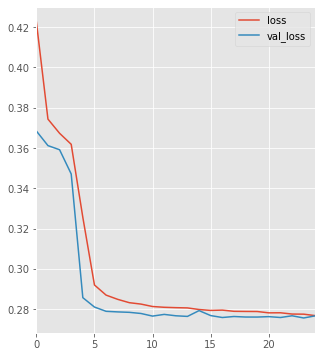

In [673]:
losses = pd.DataFrame(model.history.history)
losses.plot()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [682]:
# CODE HERE
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict_classes(X_test)

In [683]:
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [688]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     25480
           1       0.88      1.00      0.94    104943

    accuracy                           0.89    130423
   macro avg       0.94      0.72      0.77    130423
weighted avg       0.90      0.89      0.87    130423



In [687]:
confusion_matrix(y_test, predictions)

array([[ 10985,  14495],
       [    69, 104874]])

**TASK: Given the customer below, would you offer this person a loan?**

In [690]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt            25000
term                    60
int_rate             18.24
installment         638.11
annual_inc           61665
                     ...  
OTHER                    0
OWN                      0
RENT                     1
zip_code             30723
earliest_cr_year      1996
Name: 305323, Length: 71, dtype: object

In [704]:
cust_data = np.asarray(new_customer.values).astype('float32')

In [708]:
# CODE HERE
model.predict_classes(cust_data.reshape(1,71))
# type(new_customer.values)

array([[1]], dtype=int32)

**TASK: Now check, did this person actually end up paying back their loan?**

In [709]:
df.iloc[random_ind]

loan_amnt            25000
term                    60
int_rate             18.24
installment         638.11
annual_inc           61665
                     ...  
OTHER                    0
OWN                      0
RENT                     1
zip_code             30723
earliest_cr_year      1996
Name: 305323, Length: 72, dtype: object